In [194]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
from src.processing.relation_extraction_evaluator import RelationExtractorEvaluator, RelationGranularMetrics
from src.config import get_config_from_stem

# Define path for the test dataset
# data_stem="dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-mxTrnCp3"
data_stem="dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC"
test_file_path = f"/home/murilo/RelNetCare/data/processed/{data_stem}/{data_stem}-test.json"

# get config and evaluator
config = get_config_from_stem(data_stem)
evaluator = RelationExtractorEvaluator(config=config)

# Evaluate performance
df = evaluator.assess_performance_on_test_dataset(test_file_path, cap_size=None, return_details=True)
df.sort_values(['f1s', 'raw_inference'], ascending=[False, False])


output_dir= /home/murilo/RelNetCare/data/processed/dialog-re-llama-11cls-balPairs-rebalPairs-rwrtKeys-instrC



Script successfully executed!
Avg P: 26.8% | Avg R: 23.6% | Avg F1: 23.8% | Errors: 16/162 (10%)
# INFERENCE REPORT
/home/murilo/RelNetCare/data/processed/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-test_20230906_125304.xlsx



,id,prompt,raw_inference,true_labels,predicted_labels,correct_labels,wrong_labels,missing_labels,dialogue,f1s,precision,recall,error_message
82,identity_119,Extract entities and relations from the dialog...,"[{""subject"": ""Speaker 4"", ""subject_type"": ""PER...","[\n {\n ""subject"": ""Speaker 6"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 4"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 6"",\n ""subject_t...",[],[],Extract entities and relations from the dialog...,1.0,1.0,1.0,
6,identity_6,Extract entities and relations from the dialog...,"[{""subject"": ""Speaker 4"", ""subject_type"": ""PER...","[\n {\n ""subject"": ""Speaker 4"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 4"",\n ""subject_t...","[\n {\n ""subject"": ""Barbara"",\n ""subject_typ...",[],[],Extract entities and relations from the dialog...,1.0,1.0,1.0,
106,identity_186,Extract entities and relations from the dialog...,"[{""subject"": ""Speaker 3"", ""subject_type"": ""PER...","[\n {\n ""subject"": ""Speaker 3"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 3"",\n ""subject_t...","[\n {\n ""subject"": ""Carol"",\n ""subject_type""...",[],[],Extract entities and relations from the dialog...,1.0,1.0,1.0,
65,identity_76,Extract entities and relations from the dialog...,"[{""subject"": ""Speaker 2"", ""subject_type"": ""PER...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...",[],[],Extract entities and relations from the dialog...,1.0,1.0,1.0,
151,identity_322,Extract entities and relations from the dialog...,"[{""subject"": ""Speaker 2"", ""subject_type"": ""PER...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...",[],[],Extract entities and relations from the dialog...,1.0,1.0,1.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,identity_226,Extract entities and relations from the dialog...,"[{""subject"": ""Speaker 1"", ""subject_type"": ""PER...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 1"",\n ""subject_t...",None,None,[],None,None,NaN,NaN,Unterminated string starting at: line 1 column...
148,identity_311,Extract entities and relations from the dialog...,"[{""subject"": ""Speaker 1"", ""subject_type"": ""PER...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 1"",\n ""subject_t...",None,None,"[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...",None,None,NaN,NaN,Unterminated string starting at: line 1 column...
85,identity_123,Extract entities and relations from the dialog...,"[{""subject"": ""Speaker 1"", ""subject_type"": ""PER...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...",None,None,"[\n {\n ""subject"": ""Speaker 2"",\n ""subject_t...",None,None,NaN,NaN,Unterminated string starting at: line 1 column...
36,identity_36,Extract entities and relations from the dialog...,None,"[\n {\n ""subject"": ""Speaker 1"",\n ""subject_t...","[\n {\n ""subject"": ""Speaker 1"",\n ""subject_t...",None,None,"[\n {\n ""subject"": ""Speaker 1"",\n ""subject_t...",None,None,NaN,NaN,"Invalid response object from API: '{""object"":""..."


In [197]:
idx=1
print(df.prompt.iloc[idx])
print(df.raw_inference.iloc[idx])

Extract entities and relations from the dialogue. Return a Python list of JSON objects, each fitting this schema: {"subject": "<Entity>", "subject_type": "<Date/Animal/Event/Organization/Person/Location>", "relation": "<acquaintance/children/other_family/parents/pet/place_of_residence/residents_of_place/siblings/spouse/visited_place/visitors_of_place>", "object": "<Related Entity>", "object_type": "<Date/Animal/Event/Organization/Person/Location>"}. No additional text or explanations. Return an empty list if no relevant entities or relations are found. Stick to the provided types and relations. You are like an API, you don't speak you only return JSON objects.
Dialogue: 
[
 "Speaker 1: Hi, Ursula.",
 "Speaker 2: Hey!",
 "Speaker 1: Okay, well umm, I know that we haven’t talked in a long time, but umm okay, our Mom is not our birth Mom. This-this other lady is our birth Mom.",
 "Speaker 2: Right, okay, the one that lives in Montuak, umm-hmm.",
 "Speaker 1: You know her?!",
 "Speaker 2: 

In [198]:
# p = '/home/murilo/RelNetCare/data/processed/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-mxTrnCp3/dialog-re-llama-11cls-rebalPairs-rwrtKeys-instrC-mxTrnCp3-test_20230906_075145.xlsx'

# import pandas as pd

# result_df = pd.read_excel(p)
# # result_df 

# def try_convert_to_dict(labels):
#     try:
#         return json.dumps([dict(literal_eval(x)) for x in literal_eval(labels)], indent=1)
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         return None



# for col in result_df.columns:
#     if 'labels' in col:
#         result_df[col] = result_df[col].apply(try_convert_to_dict)

result_df.to_excel(p)

In [199]:
print(df.predicted_labels.apply(lambda x: str(x).replace("([('su", "\n([('su")).iloc[0]
)

[
 {
  "subject": "Speaker 1",
  "subject_type": "PER",
  "relation": "parents",
  "object": "Frank",
  "object_type": "PER"
 },
 {
  "subject": "Frank",
  "subject_type": "PER",
  "relation": "children",
  "object": "Speaker 1",
  "object_type": "PER"
 }
]


In [200]:
# # "dialog-re-llama-35cls-trToDial-rwrtKeys-instrA"
# idx = 5 # good: 5 | unfinished: 6,7,8 | bad: 9
# tmp = df.iloc[idx]
# print(f"## PROMPT (idx={idx}, tmp.id={tmp.id})\n",tmp.prompt.replace('",\n', '",').replace('{\n', '{').replace('\n }', '}'))
# print("## PREDICTION\n",tmp.raw_inference)


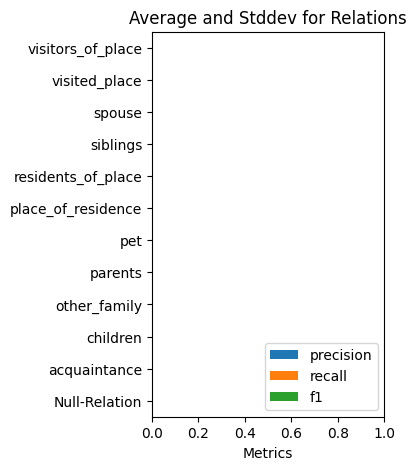

In [211]:
from src.processing.relation_extraction_evaluator import RelationExtractorEvaluator, RelationGranularMetrics

# Define your ontology
your_ontology = {
    "Null-Relation", "other_family", "siblings",
    "visited_place", "place_of_residence",
    "spouse", "pet", "acquaintance", "children",
    "visitors_of_place", "residents_of_place", "parents", 
    
    # "title", "alternate_names", "place_of_work", "unanswerable"
    }


# your_ontology = config.all_relations
# Usage
my_metrics = RelationGranularMetrics(df, your_ontology)
result = my_metrics.process()
chart_df = my_metrics.to_dataframe()
my_metrics.plot_metrics(chart_df, figsize=(3,5))


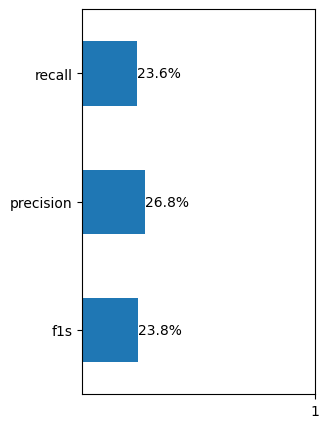

In [202]:
import matplotlib.pyplot as plt

# Your plotting code here
ax = df[['f1s', 'precision', 'recall']].mean().plot(kind='barh', alpha=1, figsize=(3, 5))

# Set x-axis tick labels
plt.xticks([1], ['1'])

# Adding data values on top of each bar
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1%}', 
             va='center', ha='left')

# Show the plot
plt.show()


<Axes: ylabel='Frequency'>

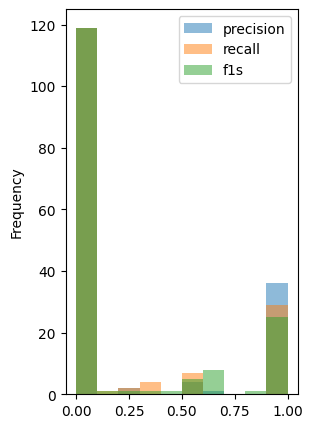

In [203]:
df[['precision', 'recall', 'f1s']].fillna(0).plot(kind='hist', alpha=0.5, figsize=(3, 5))


In [204]:
print(config.preprompt)

Extract entities and relations from the dialogue. Return a Python list of JSON objects, each fitting this schema: {"subject": "<Entity>", "subject_type": "<Animal/Organization/Location/Person/Date/Event>", "relation": "<acquaintance/children/other_family/parents/pet/place_of_residence/residents_of_place/siblings/spouse/visited_place/visitors_of_place>", "object": "<Related Entity>", "object_type": "<Animal/Organization/Location/Person/Date/Event>"}. No additional text or explanations. Return an empty list if no relevant entities or relations are found. Stick to the provided types and relations. You are like an API, you don't speak you only return JSON objects.
Dialogue: {input_dialogue}


In [9]:
dialogue = 'Speaker 1: Hi, you are my father.\nSpeaker 2: Yes, I am your father'
# dialogue = 'Speaker 1: I went to Maryland.\nSpeaker 2: Why?\nSpeaker 1: I work at Google there.'
# dialogue = 'Speaker 1: I love my husband.\nSpeaker 2: Sweet! What is his name?\nSpeaker 1: John.'
# dialogue = 'Speaker 1: I love my husband.\nSpeaker 2: Sweet! '
jsonl = evaluator.infer_from_model(dialogue, preprompt=config.preprompt)
print(dialogue)

try:
    print(jsonl.replace('},', '},\n'))
except Exception as e:
    print(f'Exception={e}')
    print(jsonl)

Speaker 1: Hi, you are my father.
Speaker 2: Yes, I am your father

Extract personal relevant entities, and their relations. Return only the jsonl format list. Extract entities and relations from the given dialogue input and generate a JSON list as output that is structured according to the entity and relation types from the ontology.

Ontology: 
- relations: {"place_of_residence", "siblings", "residents_of_place", "visited_place", "visitors_of_place", "other_family", "parents", "pet", "acquaintance", "children", "spouse"}
- types: {"ORG", "GPE", "PERSON", "DATE", "EVENT", “ANIMAL”}

Input:
[
"Speaker 1: Hi, you are my father.",
"Speaker 2: Yes, I am your father",
]

Output:
[
{"subject": "Speaker 1", "subject_type": "PERSON", "relation": "siblings", "object": "Speaker 2", "object_type": "PERSON"},

{"subject": "Speaker 2", "subject_type": "PERSON", "relation": "siblings", "object": "Speaker 1", "object_type": "PERSON"},

{"subject": "Speaker 1", "subject_type": "PERSON", "relation": "